In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from adjustText import adjust_text
from highlight_text import fig_text

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
df = pd.read_csv('xgroll.csv')
df

,Date,Round,Venue,Result,GF,GA,Opponent,xG,xGA,Poss
0,2020-09-21,Matchweek 1,Away,W,3,1,Wolves,1.9,1.0,65
1,2020-09-27,Matchweek 3,Home,L,2,5,Leicester City,0.9,2.6,72
2,2020-10-03,Matchweek 4,Away,D,1,1,Leeds United,1.5,1.7,48
3,2020-10-17,Matchweek 5,Home,W,1,0,Arsenal,1.5,0.9,59
4,2020-10-24,Matchweek 6,Away,D,1,1,West Ham,1.1,0.5,70
...,...,...,...,...,...,...,...,...,...,...
62,2022-02-12,Matchweek 25,Away,W,4,0,Norwich City,4.6,0.5,72
63,2022-02-19,Matchweek 26,Home,L,2,3,Tottenham,2.1,1.8,71
64,2022-02-26,Matchweek 27,Away,W,1,0,Everton,1.6,0.8,67
65,2022-03-06,Matchweek 28,Home,W,4,1,Manchester Utd,2.7,0.5,69


In [17]:
TEAM_NAME = "Manchester City"
window = 5
gd_color = "dodgerblue"
xgd_color = "gold"

df["GD"] = df["GF"] - df["GA"]
df["xGD"] = df["xG"] - df["xGA"]

gd_rolling = df["GD"].rolling(window).mean().values[window:]
xgd_rolling = df["xGD"].rolling(window).mean().values[window:]
gd_rolling

array([-0.2,  0.4,  0. ,  0.8,  1.2,  1. ,  1. ,  1.6,  1. ,  1. ,  1.2,
        2. ,  2.2,  2.8,  2.6,  2.8,  2.6,  2.8,  2.2,  2.2,  2. ,  2. ,
        1. ,  1.2,  1.6,  1.8,  1. ,  1.6,  1.4,  0.6,  0.4,  0.4,  1.2,
        0.6,  1.8,  2.6,  3. ,  2. ,  2.4,  1.4,  0.8,  1.2,  0.8,  1. ,
        1.6,  1.4,  1. ,  1.8,  1.6,  2.4,  3. ,  3.4,  3.2,  3.2,  2. ,
        1.2,  1. ,  1.6,  1.2,  1.2,  1.8,  1.4])

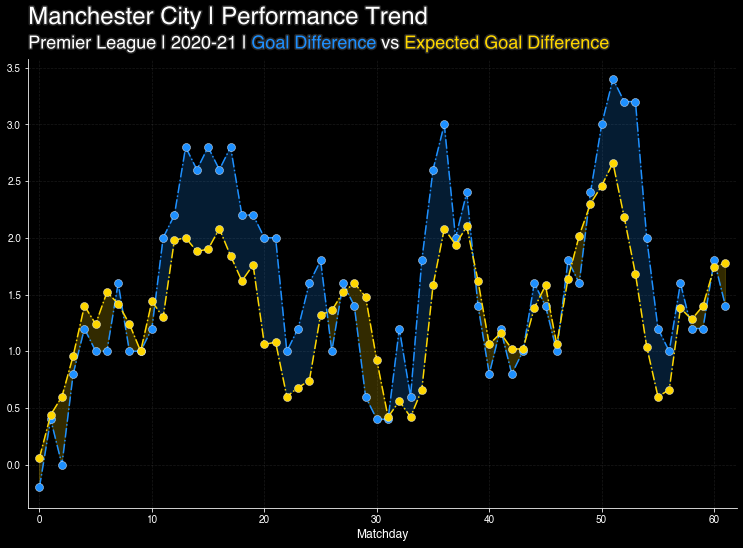

In [18]:
with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(gd_rolling, color=gd_color,  linestyle="-.", marker="o",  mfc=gd_color, mec="white", markersize=8, mew=0.4, zorder=10)  ##goal-difference
    ax.plot(xgd_rolling, color=xgd_color,  linestyle="-.", marker = "o", mfc=xgd_color, mec="white", markersize=8, mew=0.4, zorder=10) ##expected goals difference
    
    ax.fill_between(x=range(len(gd_rolling)), y1=gd_rolling, y2=xgd_rolling, where = gd_rolling>xgd_rolling, 
                    alpha=0.2, color=gd_color, interpolate=True, zorder=5) ##shade the areas in between
    ax.fill_between(x=range(len(gd_rolling)), y1=gd_rolling, y2=xgd_rolling, where = gd_rolling<=xgd_rolling, 
                    alpha=0.2, color=xgd_color, interpolate=True, zorder=5)
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)  
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## labels, titles and subtitles
    ax.set(xlabel=f"Matchday", xlim=(-1, len(df)-window))     
    ax.xaxis.label.set(fontsize=12, fontweight='bold')    

    fig.text(x=0.08, y=0.92, s="Manchester City | Performance Trend", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s='Premier League | 2020-21 | <Goal Difference> vs <Expected Goal Difference>',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()],
             highlight_textprops=[{"color": gd_color},
                                  {"color": xgd_color}])
    
fig.savefig("xg-trend-line-chart", dpi=180) ##save image

In [21]:
TEAM_NAME = "Manchester City"

window = 5
xg_color = "dodgerblue"
xga_color = "gold"


xg_rolling = df["xG"].rolling(window).mean().values[window:]
xga_rolling = df["xGA"].rolling(window).mean().values[window:]
xg_rolling

array([1.3 , 1.44, 1.4 , 1.66, 2.04, 1.98, 2.04, 2.  , 1.8 , 1.68, 1.96,
       1.76, 2.4 , 2.44, 2.2 , 2.2 , 2.64, 2.36, 2.26, 2.42, 2.02, 1.86,
       1.58, 1.82, 1.88, 2.22, 2.24, 2.22, 2.1 , 2.08, 1.88, 1.6 , 1.84,
       1.8 , 1.9 , 2.4 , 2.78, 2.48, 2.44, 2.14, 1.76, 1.96, 1.96, 2.02,
       2.24, 2.28, 1.68, 2.18, 2.48, 2.74, 2.94, 3.44, 2.88, 2.54, 1.96,
       1.66, 1.38, 2.14, 2.2 , 2.38, 2.6 , 2.66])

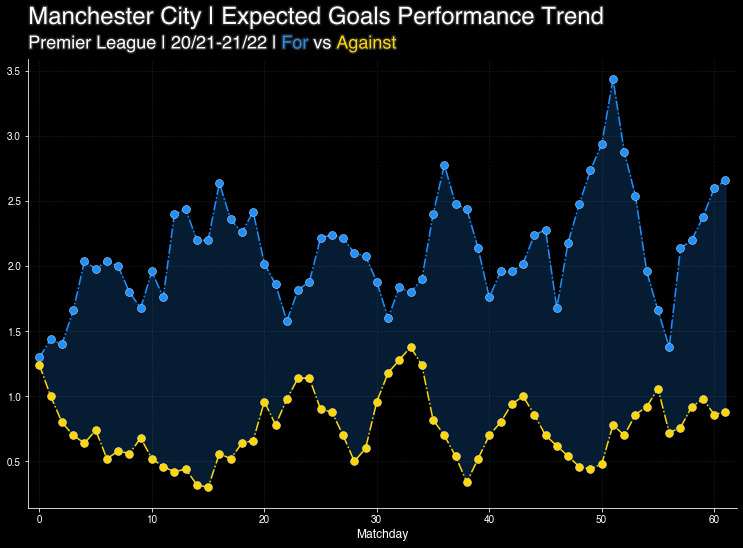

In [22]:
with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(xg_rolling, color=xg_color,  linestyle="-.", marker="o",  mfc=xg_color, mec="white", markersize=8, mew=0.4, zorder=10)  ##expected goals
    ax.plot(xga_rolling, color=xga_color,  linestyle="-.", marker = "o", mfc=xga_color, mec="white", markersize=8, mew=0.4, zorder=10) ##expected goals against
    
    ax.fill_between(x=range(len(xg_rolling)), y1=xg_rolling, y2=xga_rolling, where = xg_rolling>xga_rolling, 
                    alpha=0.2, color=xg_color, interpolate=True, zorder=5) ##shade the areas in between
    ax.fill_between(x=range(len(xg_rolling)), y1=xg_rolling, y2=xga_rolling, where = xg_rolling<=xga_rolling, 
                    alpha=0.2, color=xga_color, interpolate=True, zorder=5)
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)  
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## labels, titles and subtitles
    ax.set(xlabel=f"Matchday", xlim=(-1, len(df)-window))     
    ax.xaxis.label.set(fontsize=12, fontweight='bold')    

    fig.text(x=0.08, y=0.92, s="Manchester City | Expected Goals Performance Trend", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s='Premier League | 20/21-21/22 | <For> vs <Against>',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()],
             highlight_textprops=[{"color": gd_color},
                                  {"color": xgd_color}])
    
fig.savefig("xg-trend-line-chart", dpi=180) ##save image

In [23]:
df1 = pd.read_csv('xgroll1.csv')
df1.head(10)

,Date,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss
0,2018-08-12,Matchweek 1,Sun,Away,W,2,0,Arsenal,1.8,0.6,57
1,2018-08-19,Matchweek 2,Sun,Home,W,6,1,Huddersfield,3.4,0.6,77
2,2018-08-25,Matchweek 3,Sat,Away,D,1,1,Wolves,1.5,1.1,71
3,2018-09-01,Matchweek 4,Sat,Home,W,2,1,Newcastle Utd,2.6,0.7,78
4,2018-09-15,Matchweek 5,Sat,Home,W,3,0,Fulham,4.1,0.3,64
5,2018-09-22,Matchweek 6,Sat,Away,W,5,0,Cardiff City,2.5,0.1,78
6,2018-09-29,Matchweek 7,Sat,Home,W,2,0,Brighton,3.0,0.5,79
7,2018-10-07,Matchweek 8,Sun,Away,D,0,0,Liverpool,1.2,0.4,51
8,2018-10-20,Matchweek 9,Sat,Home,W,5,0,Burnley,4.1,0.4,69
9,2018-10-29,Matchweek 10,Mon,Away,W,1,0,Tottenham,1.5,0.7,51


In [47]:
TEAM_NAME = "Manchester City"

window = 10
xg_color = "dodgerblue"
xga_color = "gold"


xG_rolling = df1["xG"].rolling(window).mean().values[window:]
xGA_rolling = df1["xGA"].rolling(window).mean().values[window:]
len(xG_rolling)


133

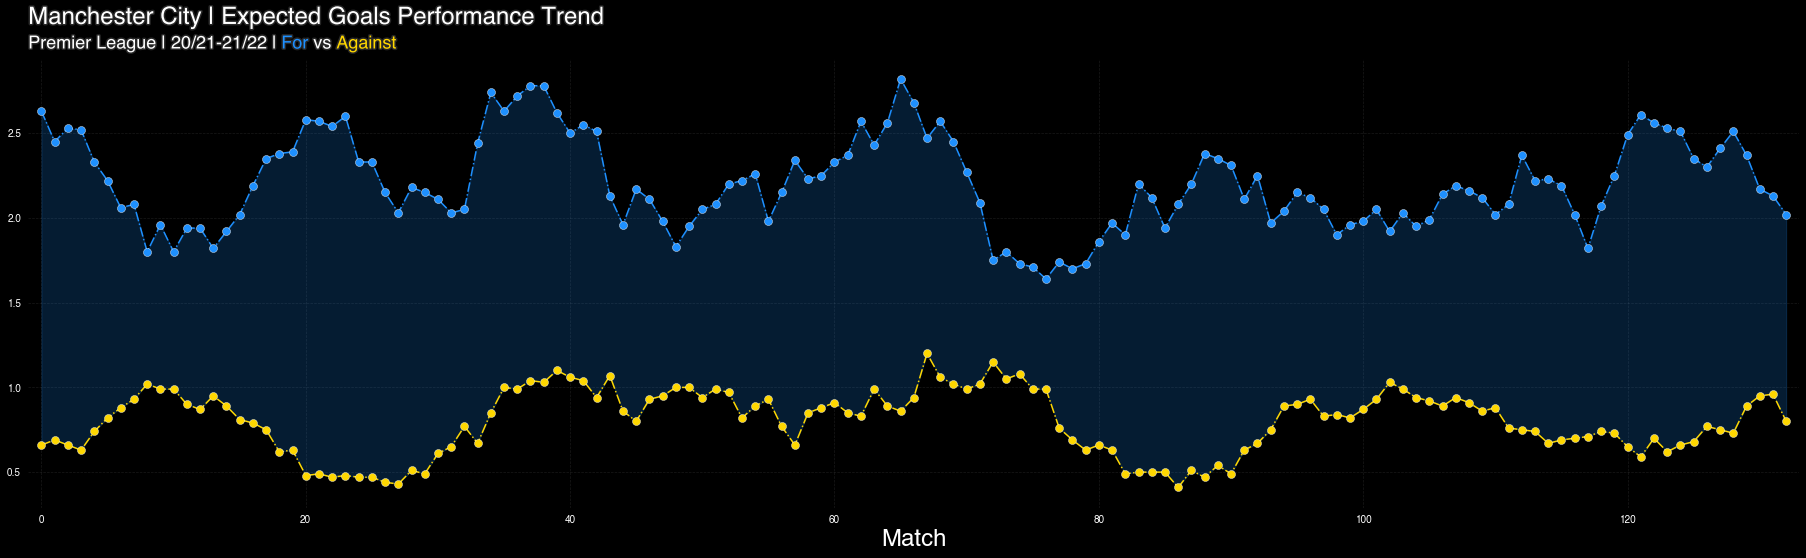

In [45]:
with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(30, 8))

    ax.plot(xG_rolling, color=xg_color,  linestyle="-.", marker="o",  mfc=xg_color, mec="white", markersize=8, mew=0.4, zorder=10)  ##expected goals
    ax.plot(xGA_rolling, color=xga_color,  linestyle="-.", marker = "o", mfc=xga_color, mec="white", markersize=8, mew=0.4, zorder=10) ##expected goals against
    
    ax.fill_between(x=range(len(xG_rolling)), y1=xG_rolling, y2=xGA_rolling, where = xG_rolling>xGA_rolling, 
                    alpha=0.2, color=xg_color, interpolate=True, zorder=5) ##shade the areas in between
    ax.fill_between(x=range(len(xG_rolling)), y1=xG_rolling, y2=xGA_rolling, where = xG_rolling<=xGA_rolling, 
                    alpha=0.2, color=xga_color, interpolate=True, zorder=5)
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right", "bottom", "left"]:
        ax.spines[spine].set_visible(False)  
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## labels, titles and subtitles
    ax.set(xlabel=f"Match", xlim=(-1, len(df1)-window))     
    ax.xaxis.label.set(fontsize=24, fontweight='bold') 
    
    plt.tick_params(left = False, bottom = False)

    fig.text(x=0.08, y=0.92, s="Manchester City | Expected Goals Performance Trend", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s='Premier League | 20/21-21/22 | <For> vs <Against>',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()],
             highlight_textprops=[{"color": gd_color},
                                  {"color": xgd_color}])
    
fig.savefig("xg-trend-line-chart", dpi=180) ##save image